In [1]:
from mynotebooks import *
%matplotlib inline  

exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,2),obj_type="box",salientMode='minimum',name='human')
learn = RobotLearning.LearningModel(exp)
nao = exp.nao

-------------------------------------------------
Created Exp Setup  human Debug:  False
Created Learning Model bDebug False


/usr/local/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


In [2]:
exp.start()
learn.iniExp('twoarmsobj','arm')
learn.load()
salientMap = learn.SM.salientMap

Loading RobotLearning Models:  5 folder twoarmsobj strid arm
data/twoarmsobj/arm-model0.data with 1950 tuples
data/twoarmsobj/arm-model1.data with 1909 tuples
load data/twoarmsobj/salient/map0.npy
load data/twoarmsobj/salient/map1.npy
load data/twoarmsobj/salient/map2.npy
load data/twoarmsobj/salient/map3.npy
load data/twoarmsobj/salient/map4.npy
load data/twoarmsobj/salient/map5.npy
load data/twoarmsobj/salient/map6.npy
load data/twoarmsobj/salient/map7.npy
Loading Salient Point Models 8
data/twoarmsobj/salient/s0-model0.data with 48310 tuples
data/twoarmsobj/salient/s0-model1.data with 1234 tuples
data/twoarmsobj/salient/s1-model0.data with 37632 tuples
data/twoarmsobj/salient/s1-model1.data with 1040 tuples
data/twoarmsobj/salient/s2-model0.data with 29774 tuples
data/twoarmsobj/salient/s2-model1.data with 400 tuples
data/twoarmsobj/salient/s3-model0.data with 45361 tuples
data/twoarmsobj/salient/s3-model1.data with 1343 tuples
data/twoarmsobj/salient/s4-model0.data with 36191 tuple

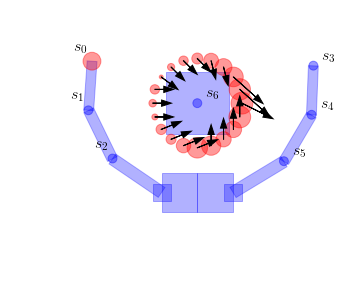

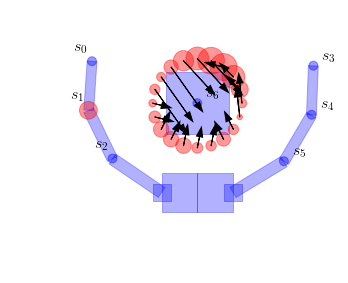

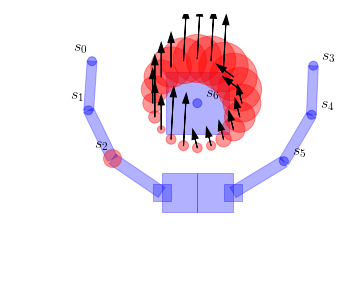

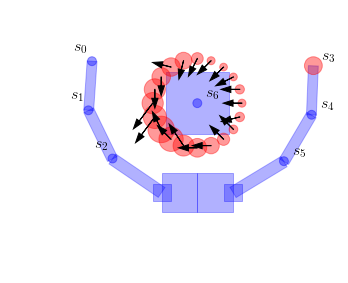

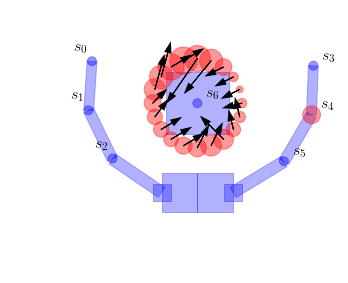

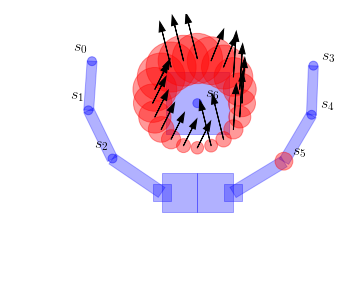

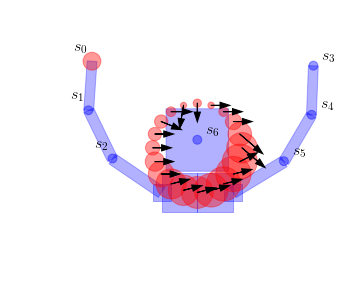

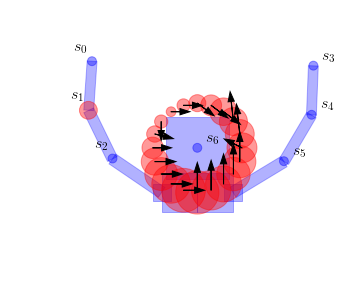

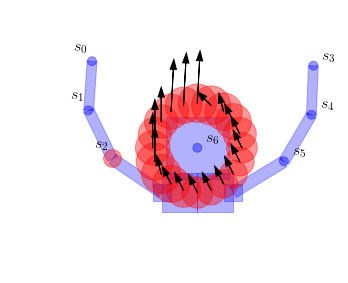

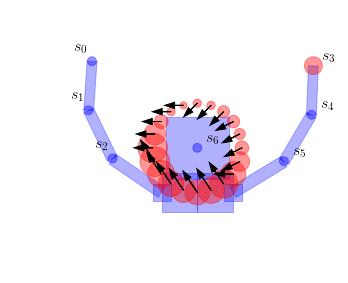

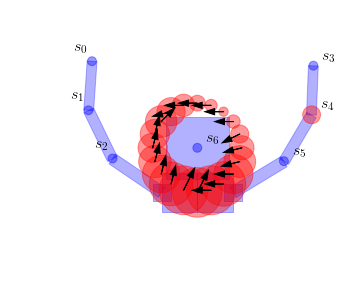

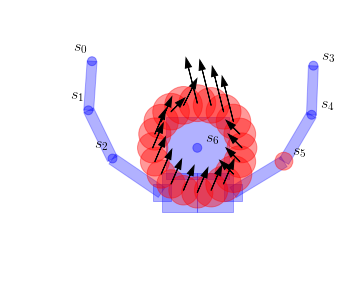

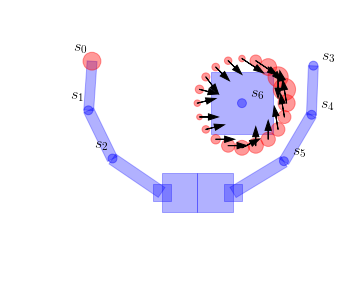

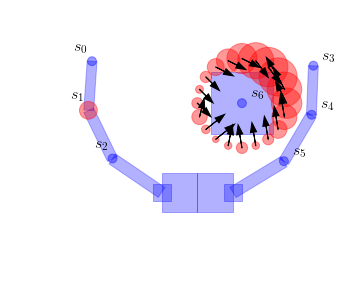

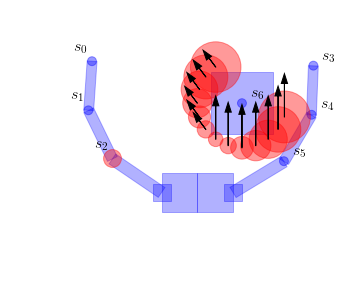

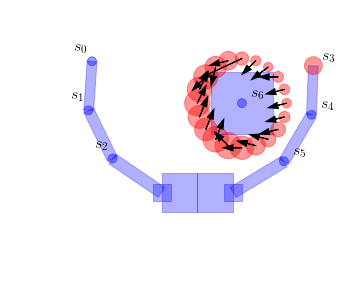

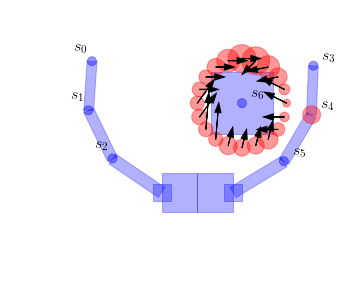

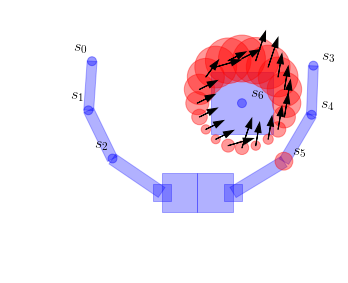

In [107]:

s6 = salientMap[6]
for i,(x,y) in enumerate([[0,1],[0,0.5],[.5,1]]):        
    for imodel in [0,1,2,3,4,5]:
        nao.restPosition(online=False)
        nao.gotoTargetJoints([1,-0.5,-0.5,-1,0.5,0.5])
        exp.setObjPos([x,y])
        pobj = np.array(exp.getObjPos())
        learn.myWorldLoop(10)

        
        fig, ax = VectorFigUtils.makeFigure(axes=[-1.5,1.5,-0.5,2])
        Box2DWorld.plotAll(ax,centers=exp.getSalient()[:-1],specials=[imodel],label="s",xlabel="x",ylabel="y",mainfont=16)

        a, da = 0, 2*np.pi / 20.0
        while(a < 2*np.pi):
            va = np.array(VectorFigUtils.vrotate(v,a))
            p = pobj + 0.5*va
            pin = pobj + 0.5*va
            
            #pin = pobj + [0,0.2]
            vin = -0.05*va
            #vin = [0,0.1]
            vout = [0,0.1]

            tin = np.hstack((pin,vin,pobj))
            fv = s6.models[imodel].forward_prediction(tin)

            #tout = np.hstack((vout,pobj))
            #iv = s6.models[imodel].inverse_prediction(tout)
            #print iv

            d = ExplautoUtils.distFwdNN(s6.models[imodel],tin)
            vel = 0.5*np.array(fv[0:2])
            #print s4.models[2].infer([4,5,6,7,8,9],[0,1,2,3],t)
            if(d<=1):
                VectorFigUtils.drawCircle(ax,p,.3*d,color='r')  
                ax.arrow(p[0], p[1], vel[0], vel[1], head_width=0.07, head_length=0.11, fc='k', ec='k')
            a += da

        plt.axis('off')
        plt.show()
        VectorFigUtils.savefig(fig,ax,'imgs/ag%d%d.png'%(imodel,i))